In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression 
from math import sqrt
import seaborn as sns
import warnings
import wrangle
warnings.filterwarnings('ignore')

In [4]:
df = wrangle.wrangle_zillow()

Acquiring data from SQL database


In [5]:
train, validate, test = wrangle.split_zillow_data(df)

Text(0.5, 1.0, 'How does square feet affect property tax value in Ventura?')

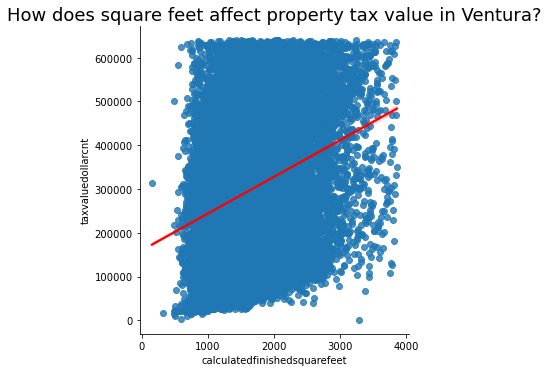

In [6]:
a = sns.lmplot(x="calculatedfinishedsquarefeet", y="taxvaluedollarcnt",
               data=train, line_kws={'color': 'red'}, palette = 'coolwarm')
plt.title('How does square feet affect property tax value in Ventura?', fontdict = {'fontsize' : 18})

### Baseline

In [12]:
train_model = train[['calculatedfinishedsquarefeet', 'taxvaluedollarcnt']]

In [13]:
baseline = train_model.taxvaluedollarcnt.mean()
baseline

295842.2744215938

In [15]:
train_model['baseline'] = train_model.taxvaluedollarcnt.mean()
train_model.head()

,calculatedfinishedsquarefeet,taxvaluedollarcnt,baseline
442,1792,585000,295842.274422
45878,1712,82288,295842.274422
45857,1422,79348,295842.274422
11954,1044,202526,295842.274422
28541,1464,459000,295842.274422


Text(0.5, 1.0, 'Baseline Model')

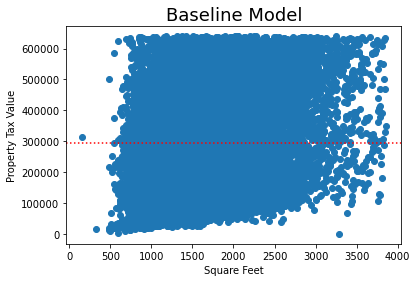

In [21]:
#plot data with baseline: 

plt.scatter(train_model.calculatedfinishedsquarefeet, train_model.taxvaluedollarcnt)
plt.axhline(train_model.taxvaluedollarcnt.mean(), ls = ':', c='red')
plt.xlabel('Square Feet')
plt.ylabel('Property Tax Value')
plt.title('Baseline Model', fontdict = {'fontsize' : 18})

### Fit a regression model using ordinary least squares method

In [22]:
#create the model object 
lm = LinearRegression(normalize=True)

#fit the model to training data 
lm.fit(train_model[['calculatedfinishedsquarefeet']], train_model.taxvaluedollarcnt)

#make prediction 
train_model['yhat'] = lm.predict(train_model[['calculatedfinishedsquarefeet']])

train_model

,calculatedfinishedsquarefeet,taxvaluedollarcnt,baseline,yhat
442,1792,585000,295842.274422,310504.427329
45878,1712,82288,295842.274422,303793.837463
45857,1422,79348,295842.274422,279467.949196
11954,1044,202526,295842.274422,247760.412076
28541,1464,459000,295842.274422,282991.008876
...,...,...,...,...
3191,1645,430277,295842.274422,298173.718449
4497,1056,155000,295842.274422,248767.000556
2109,1620,92191,295842.274422,296076.659116
47016,2936,342000,295842.274422,406465.862422


Text(0.5, 1.0, 'OLS linear model')

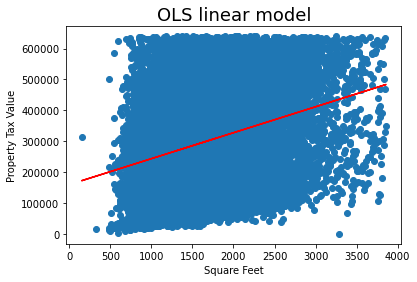

In [24]:
#Visualize the line of best fit from OLS linear model 

plt.scatter(train_model.calculatedfinishedsquarefeet, train_model.taxvaluedollarcnt)
plt.plot(train_model.calculatedfinishedsquarefeet, train_model.yhat, c='red')
plt.xlabel('Square Feet')
plt.ylabel('Property Tax Value')
plt.title('OLS linear model', fontdict = {'fontsize' : 18})

### Regression Metrics
- Compare to baseline 
- Compare different models with different independent variables

### Vocabulary 
- Residual - error (actual minus predicted)
- SSE (sum of squared error)
- MSE (mean squared error)
- RMSE (root mean squared error)

In [27]:
#residual = actual - predicted
train_model['residual'] = train_model.taxvaluedollarcnt - train_model.yhat
train_model['baseline_residual'] = train_model.taxvaluedollarcnt - train_model.baseline

In [28]:
train_model

,calculatedfinishedsquarefeet,taxvaluedollarcnt,baseline,yhat,residual,baseline_residual
442,1792,585000,295842.274422,310504.427329,274495.572671,289157.725578
45878,1712,82288,295842.274422,303793.837463,-221505.837463,-213554.274422
45857,1422,79348,295842.274422,279467.949196,-200119.949196,-216494.274422
11954,1044,202526,295842.274422,247760.412076,-45234.412076,-93316.274422
28541,1464,459000,295842.274422,282991.008876,176008.991124,163157.725578
...,...,...,...,...,...,...
3191,1645,430277,295842.274422,298173.718449,132103.281551,134434.725578
4497,1056,155000,295842.274422,248767.000556,-93767.000556,-140842.274422
2109,1620,92191,295842.274422,296076.659116,-203885.659116,-203651.274422
47016,2936,342000,295842.274422,406465.862422,-64465.862422,46157.725578


In [32]:
from sklearn.metrics import mean_squared_error

MSE2 = mean_squared_error(train_model.calculatedfinishedsquarefeet, train_model.taxvaluedollarcnt)
MSE2_baseline = mean_squared_error(train_model.taxvaluedollarcnt, train_model.baseline)

print("MSE", MSE2) 
print("MSE baseline" ,MSE2_baseline) 

MSE 114637318458.59286
MSE baseline 28122566511.276142


In [33]:
#calculate SSE

SSE2 = MSE2 * len(train_model)
SSE2_baseline = MSE2_baseline * len(train_model)

print("SSE", SSE2) 
print("SSE baseline" ,SSE2_baseline) 

SSE 2497259345301987.0
SSE baseline 612621988881639.5


In [36]:
#calculate RMSE: either take square root of MSE or use sklearn (kwarg 'squared = False')

RMSE2 = mean_squared_error(train_model.taxvaluedollarcnt, train_model.yhat, squared = False)
RMSE2_baseline = mean_squared_error(train_model.taxvaluedollarcnt, train_model.baseline, squared=False)

print("RMSE", RMSE2) 
print("RMSE baseline" ,RMSE2_baseline)  

RMSE 160808.55207607432
RMSE baseline 167697.84289392675


### Root Mean Squared Error: RMSE is most often used

In [38]:
#calculate R2 
from sklearn.metrics import r2_score
r2_score(train_model.taxvaluedollarcnt, train_model.yhat)

0.08047544627782044

### What is the amount of variance explained in your model?

RMSE = 160808

### Is your model better than the baseline model?

Yes